In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('..')
from DB_Connection.connection import PostgresConnection
from src.utils import missing_values_table, convert_bytes_to_megabytes


In [2]:
db = PostgresConnection(dbname='telecom', user='postgres', password='ab1234')
db.connect()

# Example query
query = "SELECT * FROM xdr_data"
result = db.execute_query(query)

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the connection when done
db.close_connection()


Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [3]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [4]:
df['x'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [33]:
#Checking the data types of each column
print("\nData types of each column:")
df.dtypes


Data types of each column:


Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [42]:
columns_to_convert = ['Start', 'End', 'Last Location Name']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [43]:
def get_mean(dataframe):
    numeric_df = dataframe.select_dtypes(include=['number'])
    return numeric_df.mean()

mean_row = get_mean(df)

print("Mean values of numerical columns:")
print(mean_row)

Mean values of numerical columns:
Bearer Id                                  10138874654256340992.0
Start                                                         NaN
Start ms                                                    499.2
End                                                           NaN
End ms                                                      498.8
Dur. (ms)                                                104608.6
IMSI                                            208201639651669.0
MSISDN/Number                                       41882819545.0
IMEI                                             48474547977654.5
Last Location Name                            19622902725839436.0
Avg RTT DL (ms)                                             109.8
Avg RTT UL (ms)                                              17.7
Avg Bearer TP DL (kbps)                                   13300.0
Avg Bearer TP UL (kbps)                                    1770.4
TCP DL Retrans. Vol (Bytes)               

In [44]:
# Fill null values with mean values
df_filled = df.fillna(mean_row)

# Output the DataFrame after filling null values
print("DataFrame after filling null values with mean:")
print(df_filled.head())

DataFrame after filling null values with mean:
               Bearer Id  Start  Start ms  End  End ms  Dur. (ms)  \
0 13114483460844900352.0    NaN     770.0  NaN   662.0  1823652.0   
1 13114483482878900224.0    NaN     235.0  NaN   606.0  1365104.0   
2 13114483484080500736.0    NaN       1.0  NaN   652.0  1361762.0   
3 13114483485442799616.0    NaN     486.0  NaN   171.0  1321509.0   
4 13114483499480700928.0    NaN     565.0  NaN   954.0  1089009.0   

               IMSI  MSISDN/Number             IMEI  Last Location Name  ...  \
0 208201448079117.0  33664962239.0 35521209507511.0  9164566995485190.0  ...   
1 208201909211140.0  33681854413.0 35794009006359.0 19622902725839436.0  ...   
2 208200314458056.0  33760627129.0 35281510359387.0 19622902725839436.0  ...   
3 208201402342131.0  33750343200.0 35356610164913.0 19622902725839436.0  ...   
4 208201401415120.0  33699795932.0 35407009745539.0 19622902725839436.0  ...   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Byt

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


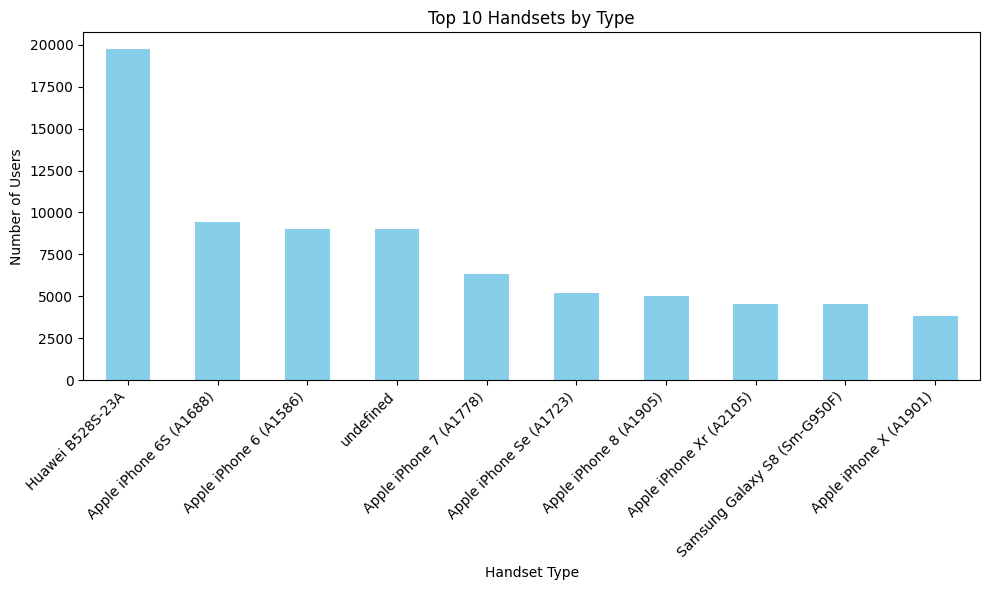

In [45]:
# Top 10 handsets by type
top_handsets = df['Handset Type'].value_counts().head(10)
print(top_handsets)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_handsets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets by Type')
plt.xlabel('Handset Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


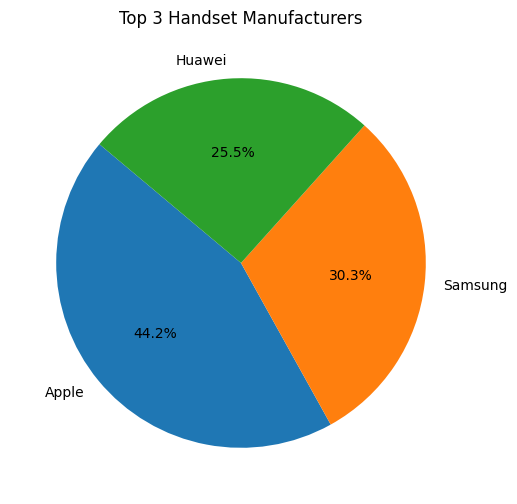

In [46]:
# Top 10 handsets by manufacturer
top_handset_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_handset_manufacturers)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_handset_manufacturers, labels=top_handset_manufacturers.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Handset Manufacturers')
plt.show()

In [47]:
# Identify the Top 3 Handset Manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index

# Filter Data and Get Top 5 Handsets for Each Manufacturer
top_handsets_per_manufacturer = {}

for manufacturer in top_manufacturers:
    # Filter the dataframe for the current manufacturer
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    
    # Get the top 5 handsets by count for this manufacturer
    top_handsets = manufacturer_df['Handset Type'].value_counts().head(5)
    
    # Store the results in the dictionary
    top_handsets_per_manufacturer[manufacturer] = top_handsets

# Print the results
for manufacturer, handsets in top_handsets_per_manufacturer.items():
    print(f"Top 5 Handsets for {manufacturer}:")
    print(handsets)
    print()

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64



In [14]:
# Aggregate per user
aggregated_data = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms).1': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    
})

In [15]:
# Rename the columns
aggregated_data.columns = [
    'Number of xDR sessions',
    'Session duration',
    'Total DL data',
    'Total UL data',
    'Social Media DL',
    'Social Media UL',
    'Netflix DL',
    'Netflix UL',
    'Google DL',
    'Google UL',
    'Email DL',
    'Email UL',
    'Gaming DL',
    'Gaming UL',
    
]

# Display the aggregated data
aggregated_data

,Number of xDR sessions,Session duration,Total DL data,Total UL data,Social Media DL,Social Media UL,Netflix DL,Netflix UL,Google DL,Google UL,Email DL,Email UL,Gaming DL,Gaming UL
MSISDN/Number,,,,,,,,,,,,,,
3.360100e+10,1,116720140.0,8.426375e+08,36053108.0,2206504.0,25631.0,10265105.0,16915876.0,3337123.0,1051882.0,837400.0,493962.0,8.110911e+08,1367528.0
3.360100e+10,1,181230963.0,1.207552e+08,36104459.0,2598548.0,62017.0,770569.0,10451194.0,4197697.0,1137166.0,2828821.0,478960.0,1.050353e+08,14714780.0
3.360100e+10,1,134969374.0,5.566597e+08,39306820.0,3148004.0,47619.0,16525919.0,2827981.0,3343483.0,99643.0,2436500.0,768880.0,5.290685e+08,9759228.0
3.360101e+10,1,49878024.0,4.019932e+08,20327526.0,251469.0,28825.0,1157362.0,784730.0,5937765.0,3740728.0,2178618.0,106052.0,3.880748e+08,3051292.0
3.360101e+10,2,37104453.0,1.363130e+09,94280527.0,2861230.0,51312.0,24971647.0,24230077.0,13728668.0,4770948.0,2247808.0,1057661.0,1.308981e+09,5816727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1,8810688.0,6.879252e+08,26716429.0,234320.0,65863.0,14754741.0,147797.0,6834178.0,697091.0,480946.0,525969.0,6.573267e+08,3034642.0
3.379000e+10,1,140988659.0,4.445751e+08,35732243.0,442214.0,56355.0,6929961.0,1601099.0,1472406.0,3957299.0,2513433.0,664.0,4.276202e+08,9383076.0
3.197021e+12,1,877385325.0,1.948281e+08,37295915.0,668596.0,46628.0,10340908.0,16251392.0,8572779.0,1865881.0,842279.0,678492.0,1.645636e+08,13485133.0


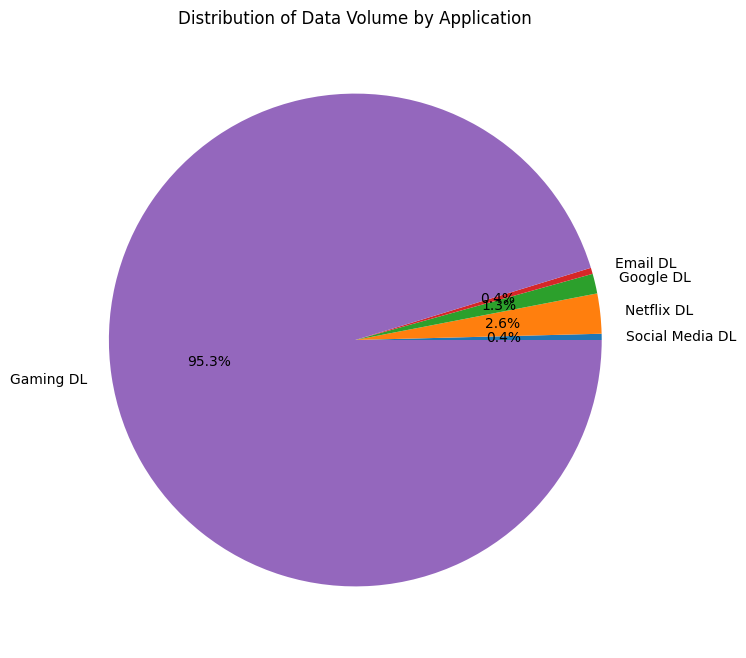

In [16]:
# Plot pie chart for data volume by application


app_data = aggregated_data[['Social Media DL', 'Netflix DL', 'Google DL', 'Email DL', 'Gaming DL']].sum()
plt.figure(figsize=(8, 8))
plt.pie(app_data, labels=app_data.index, autopct='%.1f%%')
plt.title('Distribution of Data Volume by Application')
plt.show()

In [17]:
# Assuming df is your DataFrame
metrics = df.describe()

# Display the metrics
print(metrics)


          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739   

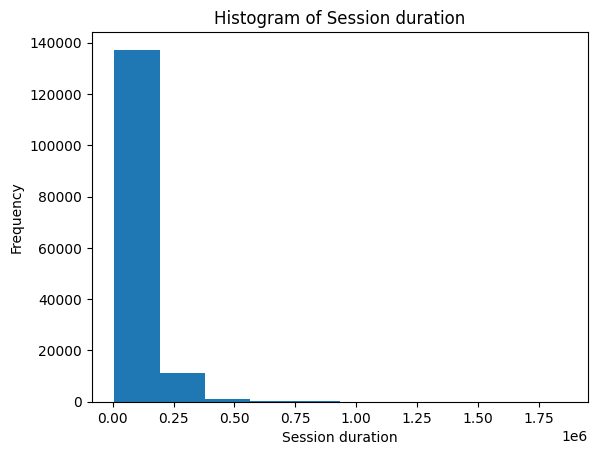

In [18]:
# Compute session duration in milliseconds
df['Session duration'] = df['Dur. (ms)']

aggregated_data['Session duration'] #= aggregated_data['End ms'] - aggregated_data['Start ms']

# Identify variable types
continuous_vars = ['Session duration']
categorical_vars = ['Bearer Id']

# Plotting options for continuous variables
for var in continuous_vars:
    plt.figure()
    df[var].plot(kind='hist', bins=10)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.show()


In [19]:
# Calculate total duration for all sessions per user
aggregated_data['Total Session Duration'] = aggregated_data['Session duration'] * aggregated_data['Number of xDR sessions']

# Sort users based on total session duration
sorted_data = aggregated_data.sort_values(by='Total Session Duration', ascending=False)

# Segment users into decile classes
num_users = len(sorted_data)
decile_size = num_users // 10
sorted_data['Decile Class'] = pd.qcut(sorted_data['Total Session Duration'], 10, labels=False)

# Compute total data (DL+UL) per decile class
total_data_by_decile = sorted_data.groupby('Decile Class')[['Total DL data', 'Total UL data']].sum()

# Print the total data per decile class
print(total_data_by_decile)

              Total DL data  Total UL data
Decile Class                              
0              4.865641e+12   4.379521e+11
1              5.006742e+12   4.535331e+11
2              5.250866e+12   4.739585e+11
3              4.882960e+12   4.439342e+11
4              5.295671e+12   4.770686e+11
5              5.425025e+12   4.901451e+11
6              5.387688e+12   4.851838e+11
7              6.902806e+12   6.217070e+11
8              9.483829e+12   8.630397e+11
9              1.520836e+13   1.377334e+12


Number of xDR Sessions

In [28]:
# Aggregate the number of xDR sessions per user
aggregated_df    = df.groupby('MSISDN/Number').size().reset_index(name='Number of xDR sessions')
print(aggregated_df)

           MSISDN/Number  Number of xDR sessions
0          33601001722.0                       1
1          33601001754.0                       1
2          33601002511.0                       1
3          33601007832.0                       1
4          33601008617.0                       2
...                  ...                     ...
106851     33789996170.0                       1
106852     33789997247.0                       1
106853   3197020876596.0                       1
106854 337000037000919.0                       1
106855 882397108489451.0                       1

[106856 rows x 2 columns]


In [ ]:
Session duration

In [30]:
session_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()

# Convert duration from milliseconds to seconds and round to 2 decimal places
session_duration_per_user['Session Duration (s)'] = session_duration_per_user['Dur. (ms)'] / 1000
session_duration_per_user['Session Duration (s)'] = session_duration_per_user['Session Duration (s)'].round(2)

session_duration_per_user.drop(columns=['Dur. (ms)'], inplace=True)

aggregated_df = aggregated_df.merge(session_duration_per_user, on='MSISDN/Number', how='left')

print(aggregated_df)

           MSISDN/Number  Number of xDR sessions  Session Duration (s)_x  \
0          33601001722.0                       1                   116.7   
1          33601001754.0                       1                   181.2   
2          33601002511.0                       1                   135.0   
3          33601007832.0                       1                    49.9   
4          33601008617.0                       2                    37.1   
...                  ...                     ...                     ...   
106851     33789996170.0                       1                     8.8   
106852     33789997247.0                       1                   141.0   
106853   3197020876596.0                       1                   877.4   
106854 337000037000919.0                       1                   253.0   
106855 882397108489451.0                       1                   869.8   

        Session Duration (s)_y  
0                        116.7  
1                    

In [51]:
# Select the desired variables
variables = ['Number of xDR sessions', 'Session duration', 'Total DL data', 'Total UL data',
             'Social Media DL', 'Social Media UL', 'Netflix DL', 'Netflix UL',
             'Google DL', 'Google UL', 'Email DL', 'Email UL', 'Gaming DL', 'Gaming UL',
             'Total Session Duration']
selected_data = aggregated_data[variables]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)

                        Number of xDR sessions  Session duration  \
Number of xDR sessions                     1.0               0.6   
Session duration                           0.6               1.0   
Total DL data                              0.8               0.5   
Total UL data                              0.9               0.6   
Social Media DL                            0.8               0.5   
Social Media UL                            0.8               0.5   
Netflix DL                                 0.8               0.5   
Netflix UL                                 0.8               0.5   
Google DL                                  0.8               0.5   
Google UL                                  0.8               0.5   
Email DL                                   0.8               0.5   
Email UL                                   0.8               0.5   
Gaming DL                                  0.8               0.5   
Gaming UL                                  0.8  

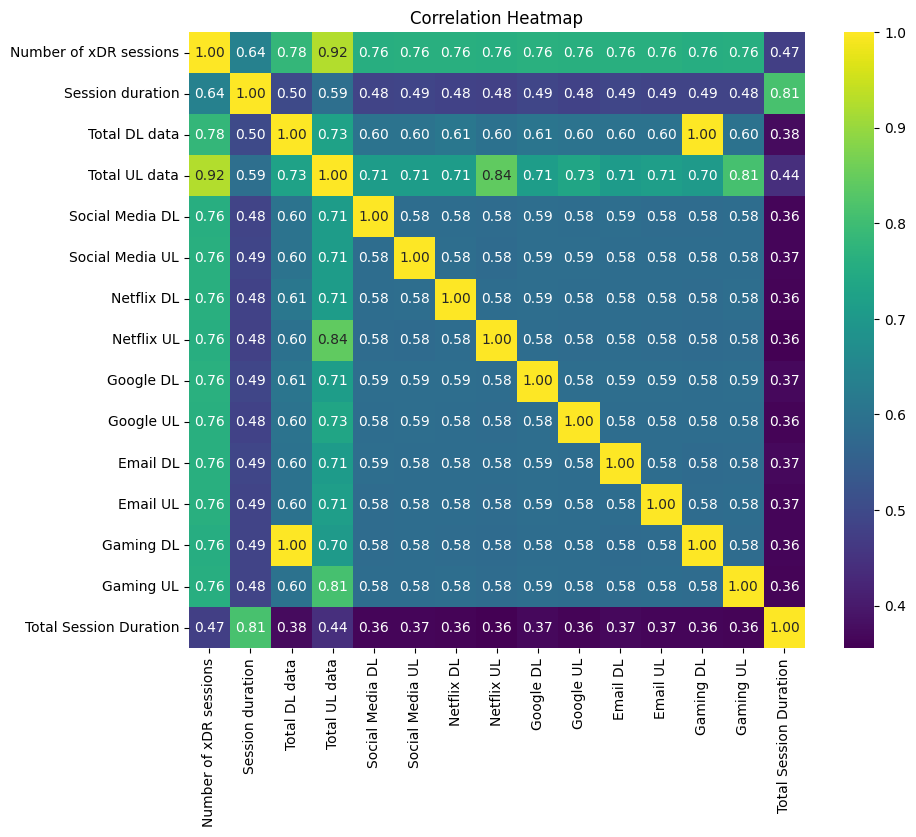

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()